# 15-Plots in plotly

In [42]:
# import libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [43]:
# importing dataset from seaborn
df = sns.load_dataset('iris')
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## 1. Scatter Plot

In [46]:
fig1 = px.scatter(df, x ='sepal_length' , y = 'sepal_width' , color = 'species')
fig1.show()
# save the plot
fig1.write_image('outputs/fig1.png', scale = 2)

## 2. Line Plot

In [47]:
# sort the data
df_line = df.sort_values(by = 'sepal_length', ascending=True)
fig2 = px.line(df_line, x = 'sepal_length' , y = 'sepal_width' , color = 'species')
fig2.show()

# save the plot
fig2.write_image('outputs/fig2.png', scale = 3)

## 3. Bar plot

In [48]:
# group the data based on means
df_bar = df.groupby('species').mean().reset_index()

fig3 = px.bar(df_bar, x = 'species' , y = 'sepal_length' , color = 'species')
fig3.show()
# save the plot
fig3.write_image('outputs/fig3.png', scale = 3)

<Axes: xlabel='species', ylabel='sepal_length'>

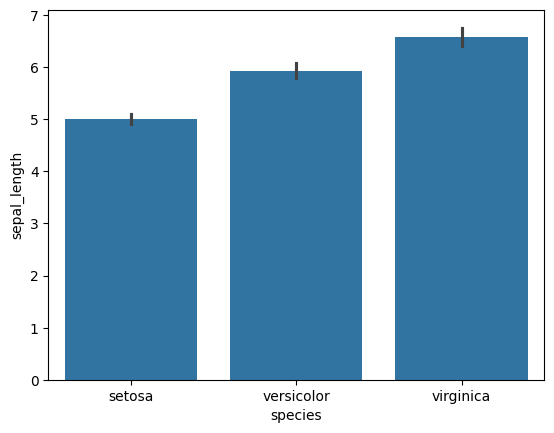

In [49]:
# seaborn does not need to make mean groups
sns.barplot(x = 'species' , y = 'sepal_length' , data = df)

## 4. Box Plot

In [50]:
fig4 = px.box(df, x = 'species' , y = 'sepal_length' , color = 'species')
fig4.show()

# save the plot
fig4.write_image("outputs/fig4.png", scale = 3)


## 5. Violin Plot

In [51]:
fig5 = px.violin(df, x = 'species' , y = 'sepal_length' , color = 'species', box=True)
fig5.show()

# save the plot
fig5.write_image("outputs/fig5.png", scale = 3)

## 6. Histogram 

In [52]:
fig6 = px.histogram(df, x = 'sepal_length'  , color = 'species')
fig6.show()

# save the plot 
fig6.write_image("outputs/fig6.png", scale = 3)

## 7. Pie Chart

In [53]:
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [57]:
df_pie = df["species"].value_counts().reset_index()
df_pie.columns = ["species", "count"]
fig7 = px.pie(df_pie,values = "count", names='species')
fig7.show()

# save the plot
fig7.write_image("outputs/fig7.png", scale = 3)

## 8. 3D Scatter Plot

In [60]:
fig8 = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_length', color='species')
fig8.show()

# save the plot
fig8.write_html("outputs/fig8.html")

## 9. Area chart 

In [65]:
df_area = df.sort_values(by='sepal_length', ascending=True)
fig9 = px.area(df_area, x = 'sepal_length' , y = 'sepal_width' , color = 'species')
fig9.show()

## 10. Bubble Chart

In [70]:
fig10 = px.scatter(df, x = 'sepal_length' , y = 'sepal_width' , color = 'species', size="petal_length")
fig10.show()

# save the plot 
fig10.write_image("outputs/fig10.png", scale = 3)

## 11. SunBurst Chart

In [74]:
fig11 = px.sunburst(df, path=['species', 'petal_width'], values='sepal_length')
fig11.show()

# save the plot 
fig11.write_html("outputs/fig11.html")
fig11.write_image("outputs/fig11.png", scale = 3)

## 12. Parallel coordinates plots

In [78]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [81]:
df["species_id"] = df["species"].astype("category").cat.codes
fig12 = px.parallel_coordinates(df, color = 'species_id', labels=["species_id", "species"])
fig12.show()

# save the plot 
fig12.write_html("outputs/fig12.html")

## 13. Density contour plot

In [83]:
fig13 = px.density_contour(df, x = "sepal_length", y = "sepal_width", z = "petal_length", color = "species")
fig13.show()

# save this plot 
fig13.write_image("outputs/fig13.png", scale = 3)

## 14. Ternary Plot

In [87]:
fig14 = px.scatter_ternary(df, a = "sepal_length", b = "sepal_width", c = "petal_length", color = "species")
fig14.show()

# save the plot 
fig14.write_image("outputs/fig14.png", scale = 3)
fig14.write_html("outputs/fig14.html")

## 15. Polar Chart (Radar chart)

In [91]:
df_radar = df.groupby("species").mean().reset_index()
fig15 = px.line_polar(df_radar, r = "petal_length", theta = "species", line_close = True)
fig15.show()

# save the plot
fig15.write_image("outputs/fig15.png", scale = 3)
fig15.write_html("outputs/fig15.html")